## Data Analysis

In [1]:
import matplotlib.pyplot as plt

def char_plot(sizes, labels):
    colors = ['yellowgreen', 'gold', 'lightskyblue']

    plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

    # Add circle at center to create the effect of a cheese graph
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title('Dataset Class Division')
    plt.axis('equal')  # Ensure circular pie
    plt.tight_layout()  # Avoid overlapping labels
    plt.show()

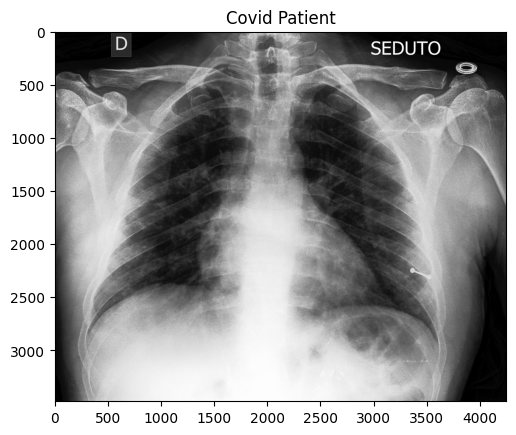

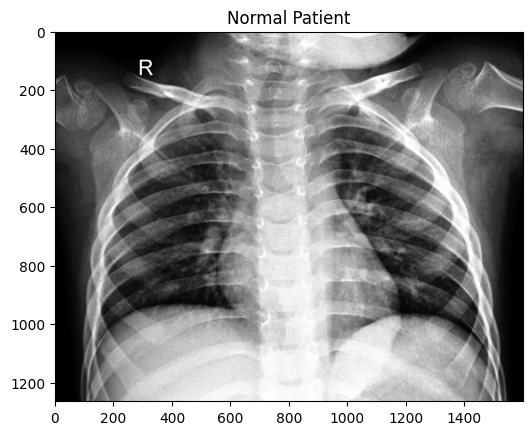

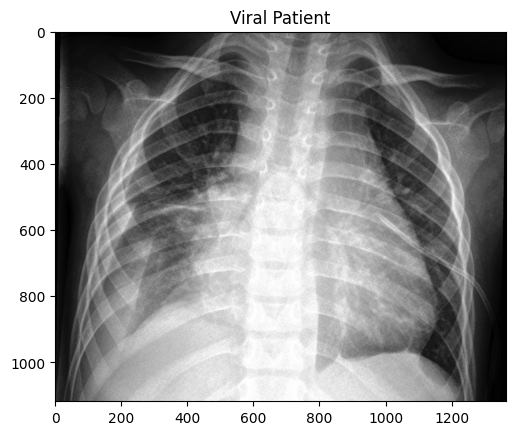

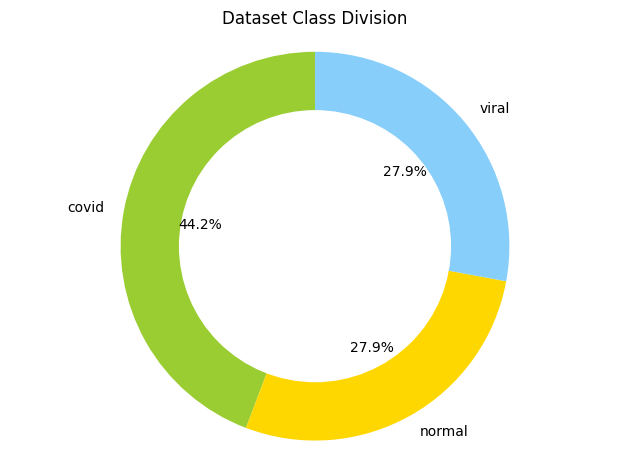

In [3]:
import os
import zipfile
import numpy as np
import matplotlib.image as mpimg

# if not os.path.isfile('./data'):
#   with zipfile.ZipFile('./data.zip', 'r') as zip_ref:
#       zip_ref.extractall('./')

directory_path = "./data/train/"
labels = ['covid', 'normal', 'viral']
sizes = np.zeros(3, dtype=np.int32)

for i, l in enumerate(labels):
    sizes[i] = len(os.listdir(directory_path + l))
    plt.imshow(mpimg.imread(directory_path + l + '/' + str(i+1) + ".jpeg"))
    plt.title(l.capitalize() + " Patient")
    plt.show()

char_plot(sizes, labels)

## Data Augmentation

## Network Architecture Design

In [ ]:
import torch.nn as nn
import torchvision

class AlexNet(nn.Module):
    def __init__(self, mode):
        super().__init__()

        # AlexNet Model
        self.alexnet = torchvision.models.alexnet(weights=torchvision.models.AlexNet_Weights.DEFAULT)

        # Alter last linear layer to output on the 3 class pneumonia dataset
        self.alexnet.classifier[6] = nn.Linear(in_features=4096, out_features=3, bias=True)

        if mode == "feature_extraction":  # Freeze all layers except last linear one
            for param in self.alexnet.parameters():
                param.requires_grad = False

            for param in self.alexnet.classifier[6].parameters():
                param.requires_grad = True

    def forward(self, x):
        return self.alexnet(x)

## Network Training and Validation

## Results